![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [565]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import os
from sklearn.model_selection import train_test_split
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [566]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [567]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [568]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [569]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [570]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [571]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [572]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [573]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [574]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [575]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1  # помечаем где у нас трейн
df_test['sample'] = 0  # помечаем где у нас тест
# в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями
df_test['Rating'] = 0

data = df_test.append(df_train, sort=False).reset_index(
    drop=True)  # объединяем

In [576]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [577]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
39593,id_1060,Oporto,NaN,1061.0,NaN,20.0,"[['What a beautiful building!!', 'A historic l...",/Restaurant_Review-g189180-d5981396-Reviews-Mc...,d5981396,1,4.0
25857,id_5512,Paris,"['French', 'European']",5513.0,$$ - $$$,148.0,[['Excellent meal just a short walk from the.....,/Restaurant_Review-g187147-d2519125-Reviews-Br...,d2519125,1,3.5
37096,id_5413,Paris,"['Italian', 'Pizza', 'European', 'Vegetarian F...",5414.0,$$ - $$$,243.0,"[['Nice food, good value.', 'Good pizza'], ['1...",/Restaurant_Review-g187147-d1385797-Reviews-De...,d1385797,1,3.5
10106,id_2926,Milan,NaN,2928.0,NaN,28.0,"[['""Best Local""', 'Perfect pitstop'], ['02/09/...",/Restaurant_Review-g187849-d6632829-Reviews-Do...,d6632829,1,4.0
19074,id_168,Geneva,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",169.0,$$ - $$$,332.0,"[['Great pizza, very expensive', 'Great food. ...",/Restaurant_Review-g188057-d3538653-Reviews-Lu...,d3538653,1,3.5


In [578]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [579]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(
    data['Number of Reviews']).astype('uint8')

In [580]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [581]:
# Далее заполняем пропуски средним, вы можете попробовать заполнением средним или средним по городу и тд...
#data['Number of Reviews'].fillna(round(data['Number of Reviews'].mean()), inplace=True)
# data.loc[data['Number_of_Reviews_isNAN']==1]
data['Number of Reviews'] = data['Number of Reviews'].fillna(
    round(data.groupby('City')['Number of Reviews'].transform('mean')))
data.loc[data['Number_of_Reviews_isNAN'] == 1]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN
7,id_7,Budapest,NaN,2330.0,NaN,159.0,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886,0,0.0,1
25,id_25,Madrid,NaN,5828.0,NaN,100.0,"[[], []]",/Restaurant_Review-g187514-d13202032-Reviews-W...,d13202032,0,0.0,1
53,id_53,Prague,NaN,2095.0,NaN,124.0,"[[], []]",/Restaurant_Review-g274707-d7124128-Reviews-Ch...,d7124128,0,0.0,1
74,id_74,Prague,"['Cafe', 'European', 'Czech']",2052.0,$,124.0,"[[""Nova' Doba""], ['01/26/2017']]",/Restaurant_Review-g274707-d12032989-Reviews-C...,d12032989,0,0.0,1
81,id_81,Barcelona,"['Peruvian', 'South American']",4325.0,$$ - $$$,136.0,"[[], []]",/Restaurant_Review-g187497-d10088997-Reviews-N...,d10088997,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49965,id_5720,Rome,NaN,5722.0,NaN,290.0,"[[], []]",/Restaurant_Review-g187791-d793376-Reviews-Wes...,d793376,1,5.0,1
49972,id_2009,Prague,"['Cafe', 'Delicatessen', 'Healthy', 'Wine Bar'...",2012.0,$,124.0,"[['Personal expirence'], ['10/27/2017']]",/Restaurant_Review-g274707-d12981295-Reviews-M...,d12981295,1,5.0,1
49986,id_7274,Madrid,NaN,7279.0,NaN,100.0,"[[], []]",/Restaurant_Review-g187514-d12182212-Reviews-C...,d12182212,1,3.0,1
49988,id_4968,Berlin,NaN,4970.0,NaN,64.0,"[[], []]",/Restaurant_Review-g187323-d7761701-Reviews-Ar...,d7761701,1,4.0,1


### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [582]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1573
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [583]:
#  Сделаем новый столбец со значением количества населения
import requests
import json


def get_city_opendata(city):
    tmp = 'https://public.opendatasoft.com/api/records/1.0/search/?dataset=worldcitiespop&q=%s&sort=population'
    cmd = tmp % (city)
    res = requests.get(cmd)
    dct = json.loads(res.content)
    out = dct['records'][0]['fields']
    # return type(out)
    if 'population' in out.keys():
        return out['population']
    else:
        return None


tmp = data.groupby(['City']).count()

tmp['City'] = tmp.index
tmp['City_Population'] = tmp['City'].apply(lambda x: get_city_opendata(x))

# Тут можно вставить fillna вручную, потому что не получилось автоматически заполнить население Кракова, Люксембурга и Опорто
tmp.at['Krakow', 'City_Population'] = 779115
tmp.at['Oporto', 'City_Population'] = 249633
tmp.at['Luxemburg', 'City_Population'] = 626108

city_columns = [s for s in tmp.columns if ('City_Population' in s) == False]
city_columns
tmp.drop(city_columns, axis=1, inplace=True)

data = data.merge(tmp, how='inner', on='City')
data['City_Population'] = data['City_Population'].fillna(
    data['City_Population'].mean())
data.head(100)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,City_Population
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,2110694.0
1,id_5,Paris,"['French', 'Cafe', 'Fast Food']",5093.0,$,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,0,2110694.0
2,id_15,Paris,['French'],12899.0,$,39.0,"[['Very nice food and staff', 'Lovely service ...",/Restaurant_Review-g187147-d7605609-Reviews-Le...,d7605609,0,0.0,0,2110694.0
3,id_31,Paris,NaN,3156.0,NaN,19.0,"[['Very good food'], ['09/24/2017']]",/Restaurant_Review-g187147-d11953078-Reviews-B...,d11953078,0,0.0,0,2110694.0
4,id_34,Paris,['French'],476.0,$$ - $$$,136.0,"[['Worthy of a trip out of the city centre!', ...",/Restaurant_Review-g187147-d9597870-Reviews-La...,d9597870,0,0.0,0,2110694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,id_792,Paris,"['Mediterranean', 'Greek']",12696.0,$,56.0,"[['Whats with the reviews?!!', 'decent fast fo...",/Restaurant_Review-g187147-d1335294-Reviews-Me...,d1335294,0,0.0,0,2110694.0
96,id_795,Paris,"['French', 'European']",515.0,$$ - $$$,126.0,"[['Innovative and really delicious!', 'Seb Mye...",/Restaurant_Review-g187147-d8858216-Reviews-Fu...,d8858216,0,0.0,0,2110694.0
97,id_804,Paris,"['French', 'Asian']",11072.0,$$ - $$$,7.0,"[['Great little coffee bar in the 5th.', 'YUMM...",/Restaurant_Review-g187147-d10468323-Reviews-O...,d10468323,0,0.0,0,2110694.0
98,id_809,Paris,['French'],4691.0,$$ - $$$,21.0,"[[], []]",/Restaurant_Review-g187147-d12503231-Reviews-L...,d12503231,0,0.0,0,2110694.0


In [584]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=['City', ], dummy_na=True)

In [585]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_5,"['French', 'Cafe', 'Fast Food']",5093.0,$,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,id_15,['French'],12899.0,$,39.0,"[['Very nice food and staff', 'Lovely service ...",/Restaurant_Review-g187147-d7605609-Reviews-Le...,d7605609,0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,id_31,NaN,3156.0,NaN,19.0,"[['Very good food'], ['09/24/2017']]",/Restaurant_Review-g187147-d11953078-Reviews-B...,d11953078,0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,id_34,['French'],476.0,$$ - $$$,136.0,"[['Worthy of a trip out of the city centre!', ...",/Restaurant_Review-g187147-d9597870-Reviews-La...,d9597870,0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [586]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
44363,id_787,['Sushi'],788.0,$$ - $$$,48.0,"[['A good place to eat quickly a fresh bite', ...",/Restaurant_Review-g187265-d7171618-Reviews-Ed...,d7171618,1,4.0,...,0,0,0,0,0,0,0,0,0,0
31396,id_5547,['Mediterranean'],5548.0,$,16.0,"[[], []]",/Restaurant_Review-g187497-d10033972-Reviews-L...,d10033972,1,3.5,...,0,0,0,0,0,0,0,0,0,0
5553,id_6806,['American'],6807.0,$,27.0,"[['Late night craving HIT', 'Decent hot dog'],...",/Restaurant_Review-g187147-d4973118-Reviews-Pa...,d4973118,1,4.0,...,0,0,1,0,0,0,0,0,0,0
10821,id_8662,"['Asian', 'Bangladeshi', 'Halal', 'Vegetarian ...",8671.0,$$ - $$$,44.0,"[['Quick lunch place for me', 'Tow or Three ti...",/Restaurant_Review-g186338-d5122799-Reviews-Ko...,d5122799,1,3.5,...,0,0,0,0,0,0,0,0,0,0
29382,id_2058,NaN,2060.0,NaN,6.0,"[['Best Apfeltorte in Vienna!'], ['07/15/2015']]",/Restaurant_Review-g190454-d8431271-Reviews-St...,d8431271,1,4.5,...,0,0,0,0,0,0,1,0,0,0


#### Возьмем следующий признак "Price Range".

In [587]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [588]:
# Ваша обработка 'Price Range'
data['Price Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')
data['Price Range_isNAN']
price_mode = data['Price Range'].value_counts().index[0]
data['Price Range'].fillna(price_mode, inplace=True)
data.loc[data['Price Range_isNAN'] == 1]

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Price Range_isNAN
3,id_31,NaN,3156.0,$$ - $$$,19.0,"[['Very good food'], ['09/24/2017']]",/Restaurant_Review-g187147-d11953078-Reviews-B...,d11953078,0,0.0,...,0,1,0,0,0,0,0,0,0,1
9,id_46,"['French', 'African']",10412.0,$$ - $$$,12.0,"[[], []]",/Restaurant_Review-g187147-d4988279-Reviews-Le...,d4988279,0,0.0,...,0,1,0,0,0,0,0,0,0,1
13,id_76,NaN,10397.0,$$ - $$$,12.0,"[['Nice place but...', 'Best arrival lunch'], ...",/Restaurant_Review-g187147-d719850-Reviews-Pro...,d719850,0,0.0,...,0,1,0,0,0,0,0,0,0,1
15,id_79,NaN,13175.0,$$ - $$$,3.0,"[[], []]",/Restaurant_Review-g187147-d8535535-Reviews-Su...,d8535535,0,0.0,...,0,1,0,0,0,0,0,0,0,1
18,id_91,"['Lebanese', 'Mediterranean']",6878.0,$$ - $$$,12.0,"[[], []]",/Restaurant_Review-g187147-d6962328-Reviews-Re...,d6962328,0,0.0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49982,id_235,"['Mediterranean', 'European', 'Seafood', 'Cont...",236.0,$$ - $$$,17.0,"[['Unforgettable', 'Excellent place for a busi...",/Restaurant_Review-g274873-d3183997-Reviews-Se...,d3183997,1,4.0,...,0,0,0,0,0,0,0,0,0,1
49985,id_316,"['Pizza', 'Cafe']",317.0,$$ - $$$,2.0,"[['best octopus under the baking lid', 'Good t...",/Restaurant_Review-g274873-d7271906-Reviews-SR...,d7271906,1,4.5,...,0,0,0,0,0,0,0,0,0,1
49993,id_258,['Fast Food'],259.0,$$ - $$$,88.0,"[['Simple but tasty'], ['03/18/2015']]",/Restaurant_Review-g274873-d7811548-Reviews-Su...,d7811548,1,5.0,...,0,0,0,0,0,0,0,0,0,1
49996,id_347,NaN,348.0,$$ - $$$,10.0,"[['By the river', 'Unique experience!'], ['08/...",/Restaurant_Review-g274873-d11924327-Reviews-K...,d11924327,1,4.0,...,0,0,0,0,0,0,0,0,0,1


In [589]:
# Ваша обработка 'Price Range'
data['Price Range'].value_counts()

$$ - $$$    40402
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [590]:
def price(s):
    if s == '$':
        return 1
    elif s == '$$ - $$$':
        return 2
    elif s == '$$$$':
        return 3
    else:
        return 0


data['Price Range'] = data['Price Range'].apply(lambda x: price(x))
data.head(15)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Price Range_isNAN
0,id_0,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,id_5,"['French', 'Cafe', 'Fast Food']",5093.0,1,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,id_15,['French'],12899.0,1,39.0,"[['Very nice food and staff', 'Lovely service ...",/Restaurant_Review-g187147-d7605609-Reviews-Le...,d7605609,0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,id_31,NaN,3156.0,2,19.0,"[['Very good food'], ['09/24/2017']]",/Restaurant_Review-g187147-d11953078-Reviews-B...,d11953078,0,0.0,...,0,1,0,0,0,0,0,0,0,1
4,id_34,['French'],476.0,2,136.0,"[['Worthy of a trip out of the city centre!', ...",/Restaurant_Review-g187147-d9597870-Reviews-La...,d9597870,0,0.0,...,0,1,0,0,0,0,0,0,0,0
5,id_35,['Thai'],7858.0,1,57.0,"[['My go to for great delivery!', 'When you wa...",/Restaurant_Review-g187147-d3256188-Reviews-Th...,d3256188,0,0.0,...,0,1,0,0,0,0,0,0,0,0
6,id_38,"['French', 'European', 'Vegetarian Friendly']",1722.0,2,572.0,"[['Upstairs Quieter and Pleasant', 'Delicious,...",/Restaurant_Review-g187147-d1326624-Reviews-Le...,d1326624,0,0.0,...,0,1,0,0,0,0,0,0,0,0
7,id_41,"['American', 'Steakhouse']",13116.0,2,372.0,"[['Worst experience ever!!', 'Bad everything']...",/Restaurant_Review-g187147-d695231-Reviews-Buf...,d695231,0,0.0,...,0,1,0,0,0,0,0,0,0,0
8,id_45,['French'],12709.0,2,49.0,"[['Touristy Cafe - Expensive', 'Much Better th...",/Restaurant_Review-g187147-d1439340-Reviews-To...,d1439340,0,0.0,...,0,1,0,0,0,0,0,0,0,0
9,id_46,"['French', 'African']",10412.0,2,12.0,"[[], []]",/Restaurant_Review-g187147-d4988279-Reviews-Le...,d4988279,0,0.0,...,0,1,0,0,0,0,0,0,0,1


> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [591]:
# Работаем со столбцом Cuisine Style
values = {'Cuisine Style': '', }
data = data.fillna(value=values)
data['Cuisine'] = data['Cuisine Style'].apply(lambda x: x.lower().replace(
    " ", "").replace("'", "").replace("[", "").replace("]", "").split(','))

data = data.join(pd.get_dummies(
    data.Cuisine.apply(pd.Series).stack()).sum(level=0))
data.head()

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,ukrainian,uzbek,veganoptions,vegetarianfriendly,venezuelan,vietnamese,welsh,winebar,xinjiang,yunnan
0,id_0,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,id_5,"['French', 'Cafe', 'Fast Food']",5093.0,1,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_15,['French'],12899.0,1,39.0,"[['Very nice food and staff', 'Lovely service ...",/Restaurant_Review-g187147-d7605609-Reviews-Le...,d7605609,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_31,,3156.0,2,19.0,"[['Very good food'], ['09/24/2017']]",/Restaurant_Review-g187147-d11953078-Reviews-B...,d11953078,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_34,['French'],476.0,2,136.0,"[['Worthy of a trip out of the city centre!', ...",/Restaurant_Review-g187147-d9597870-Reviews-La...,d9597870,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [592]:
# Ваша обработка 'Restaurant_id'
data['Restaurant_id'].value_counts()
# Столбец 'Restaurant_id' будем удалять

id_871      19
id_633      19
id_227      19
id_436      19
id_321      18
            ..
id_16093     1
id_16148     1
id_7893      1
id_11031     1
id_15332     1
Name: Restaurant_id, Length: 13094, dtype: int64

In [593]:
# Ваша обработка 'Ranking'
data['Ranking'].value_counts()
data.head()

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,ukrainian,uzbek,veganoptions,vegetarianfriendly,venezuelan,vietnamese,welsh,winebar,xinjiang,yunnan
0,id_0,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,id_5,"['French', 'Cafe', 'Fast Food']",5093.0,1,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_15,['French'],12899.0,1,39.0,"[['Very nice food and staff', 'Lovely service ...",/Restaurant_Review-g187147-d7605609-Reviews-Le...,d7605609,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_31,,3156.0,2,19.0,"[['Very good food'], ['09/24/2017']]",/Restaurant_Review-g187147-d11953078-Reviews-B...,d11953078,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_34,['French'],476.0,2,136.0,"[['Worthy of a trip out of the city centre!', ...",/Restaurant_Review-g187147-d9597870-Reviews-La...,d9597870,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [594]:
# Ваша обработка 'Reviews'. Сделаем новый столбец со значением количества дней между первым и вторым отзывом
import re
from datetime import datetime
pattern = re.compile('\d+\W\d+\W\d\d\d\d')
data['date_anons'] = data['Reviews'].apply(lambda x: pattern.findall(str(x)))
data['date_anons']


data.head(15)


def days(lst):
    if len(lst) < 2:
        return 0
    return (pd.to_datetime(lst[0]) - pd.to_datetime(lst[1])).days


data['days'] = data['date_anons'].apply(lambda x: abs(days(x)))
data.head(15)


def days_max(lst):
    if len(lst) < 1:
        return datetime.strptime('05.05.2001 21:00', '%d.%m.%Y %H:%M')
    return pd.to_datetime(lst[0])


data['last_review'] = data['date_anons'].apply(lambda x: days_max(x))

data['last_review'].max()
data.head(20)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,vegetarianfriendly,venezuelan,vietnamese,welsh,winebar,xinjiang,yunnan,date_anons,days,last_review
0,id_0,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,0,0,0,0,[],0,2001-05-05 21:00:00
1,id_5,"['French', 'Cafe', 'Fast Food']",5093.0,1,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,...,0,0,0,0,0,0,0,"[09/07/2017, 09/02/2017]",5,2017-09-07 00:00:00
2,id_15,['French'],12899.0,1,39.0,"[['Very nice food and staff', 'Lovely service ...",/Restaurant_Review-g187147-d7605609-Reviews-Le...,d7605609,0,0.0,...,0,0,0,0,0,0,0,"[01/01/2017, 11/12/2016]",50,2017-01-01 00:00:00
3,id_31,,3156.0,2,19.0,"[['Very good food'], ['09/24/2017']]",/Restaurant_Review-g187147-d11953078-Reviews-B...,d11953078,0,0.0,...,0,0,0,0,0,0,0,[09/24/2017],0,2017-09-24 00:00:00
4,id_34,['French'],476.0,2,136.0,"[['Worthy of a trip out of the city centre!', ...",/Restaurant_Review-g187147-d9597870-Reviews-La...,d9597870,0,0.0,...,0,0,0,0,0,0,0,"[09/20/2017, 04/30/2017]",143,2017-09-20 00:00:00
5,id_35,['Thai'],7858.0,1,57.0,"[['My go to for great delivery!', 'When you wa...",/Restaurant_Review-g187147-d3256188-Reviews-Th...,d3256188,0,0.0,...,0,0,0,0,0,0,0,"[10/22/2017, 05/22/2017]",153,2017-10-22 00:00:00
6,id_38,"['French', 'European', 'Vegetarian Friendly']",1722.0,2,572.0,"[['Upstairs Quieter and Pleasant', 'Delicious,...",/Restaurant_Review-g187147-d1326624-Reviews-Le...,d1326624,0,0.0,...,1,0,0,0,0,0,0,"[12/19/2017, 10/22/2017]",58,2017-12-19 00:00:00
7,id_41,"['American', 'Steakhouse']",13116.0,2,372.0,"[['Worst experience ever!!', 'Bad everything']...",/Restaurant_Review-g187147-d695231-Reviews-Buf...,d695231,0,0.0,...,0,0,0,0,0,0,0,"[01/07/2018, 12/27/2017]",11,2018-01-07 00:00:00
8,id_45,['French'],12709.0,2,49.0,"[['Touristy Cafe - Expensive', 'Much Better th...",/Restaurant_Review-g187147-d1439340-Reviews-To...,d1439340,0,0.0,...,0,0,0,0,0,0,0,"[10/16/2016, 06/14/2016]",124,2016-10-16 00:00:00
9,id_46,"['French', 'African']",10412.0,2,12.0,"[[], []]",/Restaurant_Review-g187147-d4988279-Reviews-Le...,d4988279,0,0.0,...,0,0,0,0,0,0,0,[],0,2001-05-05 21:00:00


In [595]:
data['Ranking Ratio'] = data['Ranking']/data['City_Population']*1000
data.head()

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,venezuelan,vietnamese,welsh,winebar,xinjiang,yunnan,date_anons,days,last_review,Ranking Ratio
0,id_0,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,0,0,0,[],0,2001-05-05 21:00:00,6.141582
1,id_5,"['French', 'Cafe', 'Fast Food']",5093.0,1,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,...,0,0,0,0,0,0,"[09/07/2017, 09/02/2017]",5,2017-09-07 00:00:00,2.412950
2,id_15,['French'],12899.0,1,39.0,"[['Very nice food and staff', 'Lovely service ...",/Restaurant_Review-g187147-d7605609-Reviews-Le...,d7605609,0,0.0,...,0,0,0,0,0,0,"[01/01/2017, 11/12/2016]",50,2017-01-01 00:00:00,6.111260
3,id_31,,3156.0,2,19.0,"[['Very good food'], ['09/24/2017']]",/Restaurant_Review-g187147-d11953078-Reviews-B...,d11953078,0,0.0,...,0,0,0,0,0,0,[09/24/2017],0,2017-09-24 00:00:00,1.495243
4,id_34,['French'],476.0,2,136.0,"[['Worthy of a trip out of the city centre!', ...",/Restaurant_Review-g187147-d9597870-Reviews-La...,d9597870,0,0.0,...,0,0,0,0,0,0,"[09/20/2017, 04/30/2017]",143,2017-09-20 00:00:00,0.225518


![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

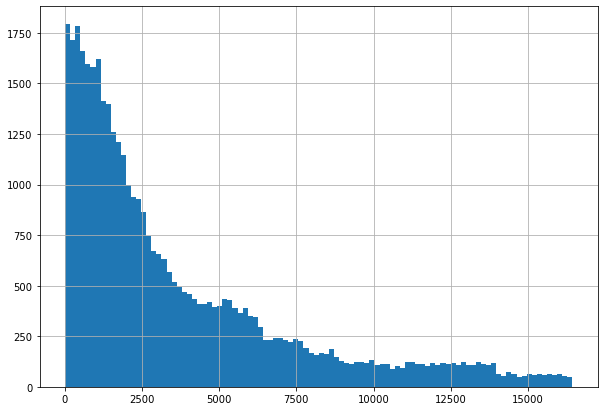

In [596]:
plt.rcParams['figure.figsize'] = (10, 7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

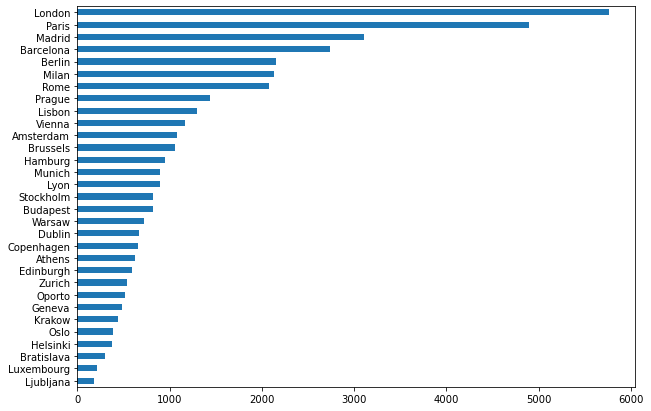

In [597]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

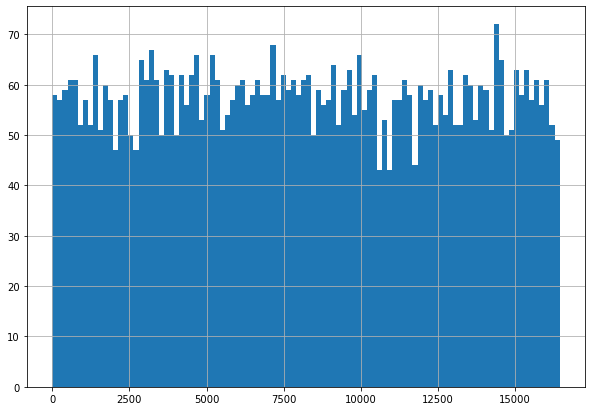

In [598]:
df_train['Ranking'][df_train['City'] == 'London'].hist(bins=100)

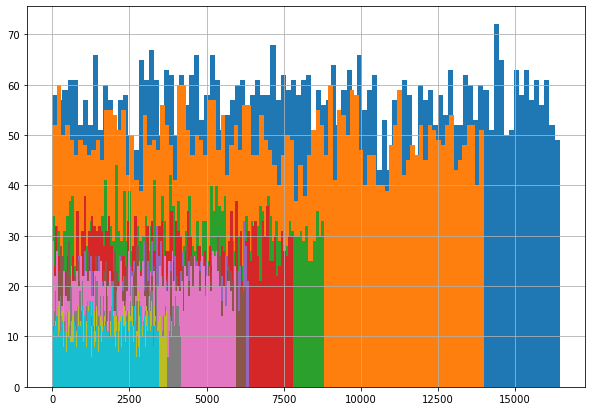

In [599]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

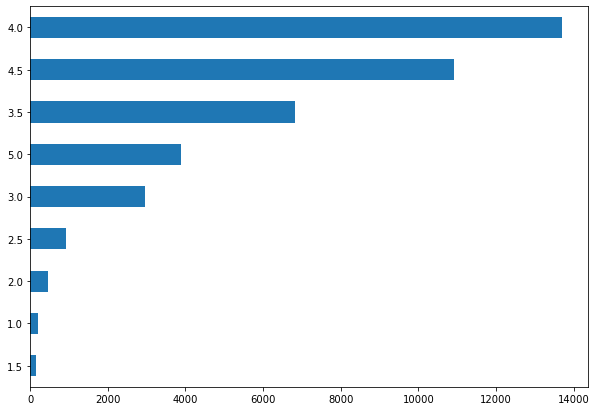

In [600]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

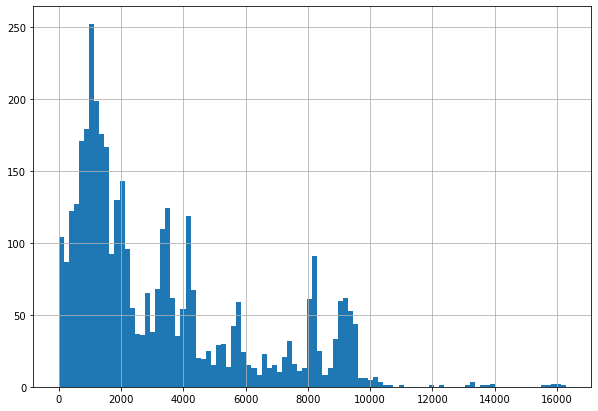

In [601]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

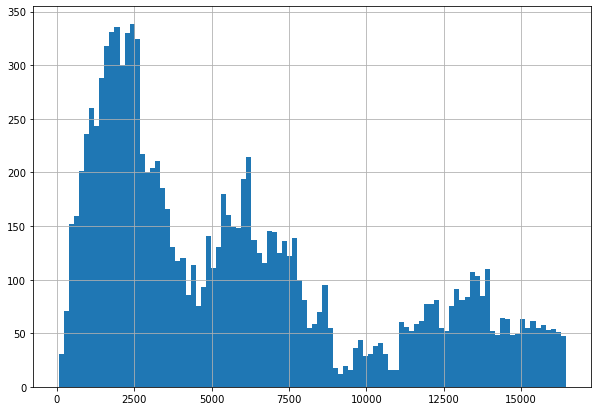

In [602]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

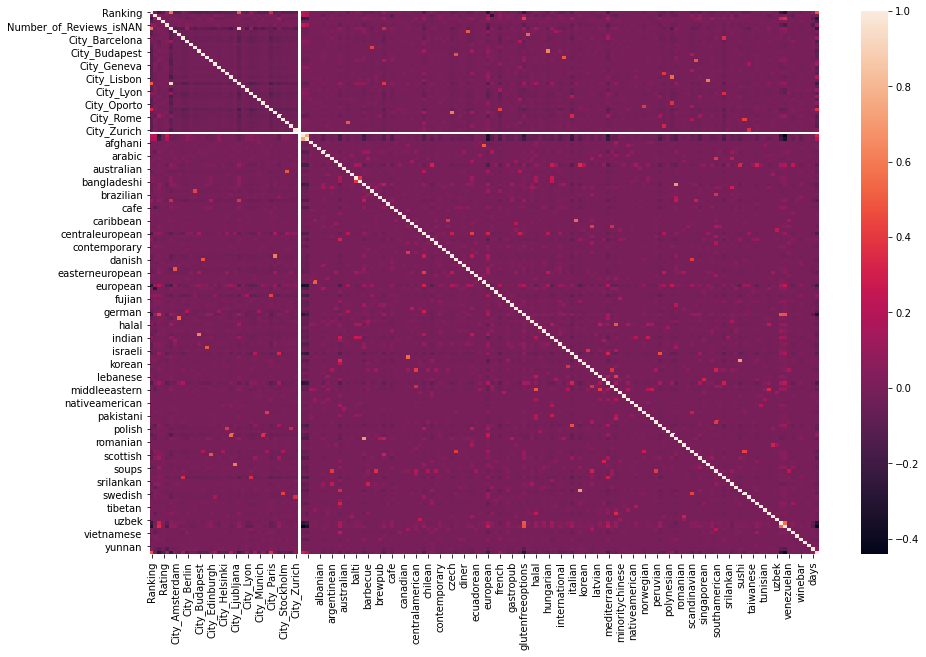

In [603]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)
# Пыталась вывести по частям или сократить количество признаков до тех, где корреляция больше. Но с хитмэп не вышло, только
# отдельно получилось их вывести

In [604]:
# Create correlation matrix
#corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.5
#to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
# to_drop
# Drop features
#data.drop(to_drop, axis=1, inplace=True)

correlation_mat = data.drop(['City_nan', 'sample'], axis=1).corr().abs()

corr_pairs = correlation_mat.unstack()
for i in correlation_mat.columns:
    for j in correlation_mat.columns:
        if correlation_mat.loc[i, j] >= 0.5 and i != j:
            print(i+' '+j + ' '+str(correlation_mat.loc[i, j]))

Ranking City_Population 0.5723318919451555
City_Population Ranking 0.5723318919451555
City_Population City_London 0.9232823941569249
City_Athens greek 0.5342673420928042
City_Budapest hungarian 0.6314772077686807
City_Lisbon portuguese 0.545825356104365
City_Ljubljana slovenian 0.603321291775143
City_London City_Population 0.9232823941569249
City_Prague czech 0.6096754400735065
Price Range_isNAN  0.7531831889528285
 Price Range_isNAN 0.7531831889528285
african ethiopian 0.50321594757792
bar pub 0.6945498442666831
caribbean jamaican 0.5383411973280796
czech City_Prague 0.6096754400735065
ethiopian african 0.50321594757792
greek City_Athens 0.5342673420928042
hungarian City_Budapest 0.6314772077686807
jamaican caribbean 0.5383411973280796
japanese sushi 0.704750257927925
portuguese City_Lisbon 0.545825356104365
pub bar 0.6945498442666831
slovenian City_Ljubljana 0.603321291775143
sushi japanese 0.704750257927925
veganoptions vegetarianfriendly 0.5564434121167396
vegetarianfriendly vegano

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [605]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
df_train['sample'] = 1  # помечаем где у нас трейн
df_test['sample'] = 0  # помечаем где у нас тест
# в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями
df_test['Rating'] = 0

data = df_test.append(df_train, sort=False).reset_index(
    drop=True)  # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [606]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''

    df_output = df_input.copy()

    # ################### 1. Предобработка ##############################################################
    # убираем не нужные для модели признаки
    #df_output.drop(['Restaurant_id','ID_TA','URL_TA'], axis = 1, inplace=True)
    df_output.drop(['ID_TA', 'URL_TA'], axis=1, inplace=True)

    # ################### 2. NAN ##############################################################
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...

    # тут ваш код по обработке NAN
    df_output['Number of Reviews'] = df_output['Number of Reviews'].fillna(
        round(df_output.groupby('City')['Number of Reviews'].transform('mean')))
    # Ваша обработка 'Price Range'
    df_output['Price Range_isNAN'] = pd.isna(
        df_output['Price Range']).astype('uint8')
    df_output['Price Range_isNAN']
    price_mode = df_output['Price Range'].value_counts().index[0]
    df_output['Price Range'].fillna(price_mode, inplace=True)
    import requests
    import json

    def get_city_opendata(city):
        tmp = 'https://public.opendatasoft.com/api/records/1.0/search/?dataset=worldcitiespop&q=%s&sort=population'
        cmd = tmp % (city)
        res = requests.get(cmd)
        dct = json.loads(res.content)
        out = dct['records'][0]['fields']
        # return type(out)
        if 'population' in out.keys():
            return out['population']
        else:
            return None

    tmp = df_output.groupby(['City']).count()

    tmp['City'] = tmp.index
    tmp['City_Population'] = tmp['City'].apply(lambda x: get_city_opendata(x))

    # Тут можно вставить fillna вручную, потому что не получилось автоматически заполнить население Кракова, Люксембурга и Опорто
    tmp.at['Krakow', 'City_Population'] = 779115
    tmp.at['Oporto', 'City_Population'] = 249633
    tmp.at['Luxemburg', 'City_Population'] = 626108

    city_columns = [s for s in tmp.columns if (
        'City_Population' in s) == False]
    city_columns
    tmp.drop(city_columns, axis=1, inplace=True)

    df_output = df_output.merge(tmp, how='inner', on='City')
    df_output.at['Krakow', 'City_Population'] = 779115
    df_output.at['Oporto', 'City_Population'] = 249633
    df_output.at['Luxemburg', 'City_Population'] = 626108
    df_output['City_Population'] = df_output['City_Population'].fillna(
        df_output['City_Population'].mean())

    # ################### 3. Encoding ##############################################################
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=['City', ], dummy_na=True)
    # тут ваш код не Encoding фитчей

    def price(s):
        if s == '$':
            return 1
        elif s == '$$ - $$$':
            return 2
        elif s == '$$$$':
            return 3
        else:
            return 0

    df_output['Price Range'] = df_output['Price Range'].apply(
        lambda x: price(x))

    values = {'Cuisine Style': '', }
    df_output = df_output.fillna(value=values)
    df_output['Cuisine'] = df_output['Cuisine Style'].apply(lambda x: x.lower().replace(
        " ", "").replace("'", "").replace("[", "").replace("]", "").split(','))

    df_output = df_output.join(pd.get_dummies(
        df_output.Cuisine.apply(pd.Series).stack()).sum(level=0))

    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    import re
    from datetime import datetime
    pattern = re.compile('\d+\W\d+\W\d\d\d\d')
    df_output['date_anons'] = df_output['Reviews'].apply(
        lambda x: pattern.findall(str(x)))
    df_output['date_anons']

    df_output.head(15)

    def days(lst):
        if len(lst) < 2:
            return 0
        return (pd.to_datetime(lst[0]) - pd.to_datetime(lst[1])).days
    df_output['days'] = df_output['date_anons'].apply(lambda x: abs(days(x)))

    df_output['Ranking Ratio'] = df_output['Ranking'] / \
        df_output['City_Population']*1000
    # ################### 5. Clean ####################################################
    # убираем признаки которые еще не успели обработать,
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [
        s for s in df_output.columns if df_output[s].dtypes == 'object']
    #df_output.drop(object_columns, axis = 1, inplace=True)
    df_output.drop(['Price Range_isNAN'], axis=1, inplace=True)

    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [607]:
df_preproc = preproc_data(data)
df_preproc2 = df_preproc.copy()
object_columns = [
    s for s in df_preproc.columns if df_preproc[s].dtypes == 'object']
df_preproc.drop(object_columns, axis=1, inplace=True)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,City_Population,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,...,veganoptions,vegetarianfriendly,venezuelan,vietnamese,welsh,winebar,xinjiang,yunnan,days,Ranking Ratio
2986,12740.0,2,191.0,1.0,3.0,2110694.0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,6.035929
23016,4354.0,2,15.0,1.0,3.5,1156903.0,0,0,0,0,...,0,0,0,0,0,0,0,0,752,3.763496
3528,5562.0,2,39.0,1.0,4.0,2110694.0,0,0,0,0,...,0,1,0,0,0,0,0,0,428,2.635152
34275,2506.0,2,3.0,1.0,3.5,1019022.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.459221
38121,2325.0,1,26.0,1.0,4.5,3102644.0,0,0,0,0,...,0,0,0,0,0,0,0,0,263,0.749361
24909,1482.0,1,4.0,1.0,4.5,1246133.0,0,0,0,0,...,0,0,0,1,0,0,0,0,3,1.189279
28211,1153.0,2,13.0,0.0,0.0,1569315.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.734715
48112,727.0,2,30.0,1.0,4.0,1089958.0,0,0,0,0,...,0,0,0,0,0,0,0,0,217,0.666998
34928,66.0,2,601.0,1.0,4.0,1019022.0,0,0,0,0,...,0,0,0,0,0,0,0,0,27,0.064768
7072,1509.0,2,27.0,1.0,3.5,435794.0,0,0,0,0,...,0,0,0,0,0,0,0,0,319,3.462645


In [608]:
df_preproc.info()
df_preproc2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 50003 entries, 0 to Luxemburg
Columns: 166 entries, Ranking to Ranking Ratio
dtypes: float64(6), int64(2), uint8(158)
memory usage: 12.2+ MB


,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,City_Population,City_Amsterdam,...,vegetarianfriendly,venezuelan,vietnamese,welsh,winebar,xinjiang,yunnan,date_anons,days,Ranking Ratio
0,id_0,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",0.0,0.0,2110694.0,0,...,0,0,0,0,0,0,0,[],0,6.141582
1,id_5,"['French', 'Cafe', 'Fast Food']",5093.0,1,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",0.0,0.0,2110694.0,0,...,0,0,0,0,0,0,0,"[09/07/2017, 09/02/2017]",5,2.412950
2,id_15,['French'],12899.0,1,39.0,"[['Very nice food and staff', 'Lovely service ...",0.0,0.0,2110694.0,0,...,0,0,0,0,0,0,0,"[01/01/2017, 11/12/2016]",50,6.111260
3,id_31,,3156.0,2,19.0,"[['Very good food'], ['09/24/2017']]",0.0,0.0,2110694.0,0,...,0,0,0,0,0,0,0,[09/24/2017],0,1.495243
4,id_34,['French'],476.0,2,136.0,"[['Worthy of a trip out of the city centre!', ...",0.0,0.0,2110694.0,0,...,0,0,0,0,0,0,0,"[09/20/2017, 04/30/2017]",143,0.225518


In [609]:
df_preproc.loc[df_preproc.City_Population.isna()]

,Ranking,Price Range,Number of Reviews,sample,Rating,City_Population,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,...,veganoptions,vegetarianfriendly,venezuelan,vietnamese,welsh,winebar,xinjiang,yunnan,days,Ranking Ratio


In [610]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)
test_data2 = df_preproc2.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [611]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED)

In [612]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape, test_data2.shape

((10000, 165),
 (40000, 165),
 (40000, 164),
 (32000, 164),
 (8000, 164),
 (10000, 170))

# Model 
Сам ML

In [613]:
# Импортируем необходимые библиотеки:
# инструмент для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  # инструменты для оценки точности модели

In [614]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(
    n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [615]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   31.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [616]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20971249999999997


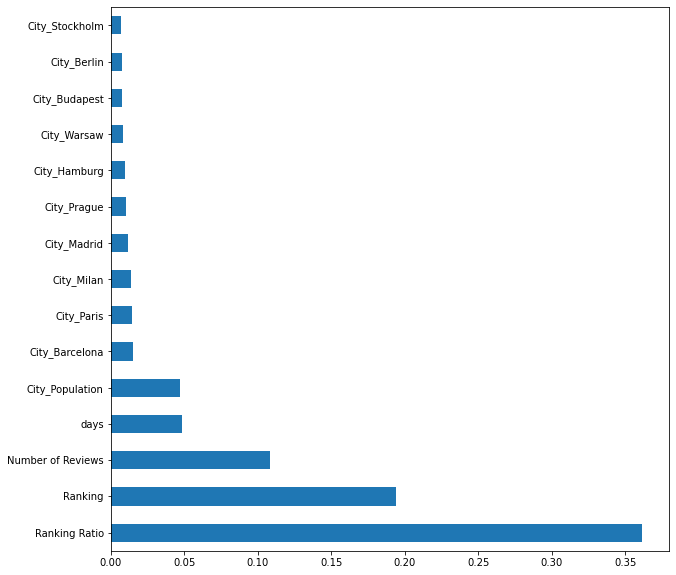

In [617]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10, 10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [618]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 49816
Columns: 165 entries, Ranking to Ranking Ratio
dtypes: float64(5), int64(2), uint8(158)
memory usage: 2.1+ MB


In [619]:
test_data = test_data.drop(['Rating'], axis=1)

In [620]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [621]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [622]:
len(predict_submission)

10000

In [623]:
test_data['Rating'] = predict_submission
test_data2['Rating'] = predict_submission
test_data2.head()

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,Rating,City_Population,City_Amsterdam,City_Athens,...,vegetarianfriendly,venezuelan,vietnamese,welsh,winebar,xinjiang,yunnan,date_anons,days,Ranking Ratio
0,id_0,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",3.025,2110694.0,0,0,...,0,0,0,0,0,0,0,[],0,6.141582
1,id_5,"['French', 'Cafe', 'Fast Food']",5093.0,1,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",4.370,2110694.0,0,0,...,0,0,0,0,0,0,0,"[09/07/2017, 09/02/2017]",5,2.412950
2,id_15,['French'],12899.0,1,39.0,"[['Very nice food and staff', 'Lovely service ...",3.120,2110694.0,0,0,...,0,0,0,0,0,0,0,"[01/01/2017, 11/12/2016]",50,6.111260
3,id_31,,3156.0,2,19.0,"[['Very good food'], ['09/24/2017']]",4.805,2110694.0,0,0,...,0,0,0,0,0,0,0,[09/24/2017],0,1.495243
4,id_34,['French'],476.0,2,136.0,"[['Worthy of a trip out of the city centre!', ...",4.500,2110694.0,0,0,...,0,0,0,0,0,0,0,"[09/20/2017, 04/30/2017]",143,0.225518


In [624]:
test_data2['Rating'] = test_data2['Rating'].apply(lambda x: round(x*2)/2)
test_data2.head()

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,Rating,City_Population,City_Amsterdam,City_Athens,...,vegetarianfriendly,venezuelan,vietnamese,welsh,winebar,xinjiang,yunnan,date_anons,days,Ranking Ratio
0,id_0,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",3.0,2110694.0,0,0,...,0,0,0,0,0,0,0,[],0,6.141582
1,id_5,"['French', 'Cafe', 'Fast Food']",5093.0,1,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",4.5,2110694.0,0,0,...,0,0,0,0,0,0,0,"[09/07/2017, 09/02/2017]",5,2.412950
2,id_15,['French'],12899.0,1,39.0,"[['Very nice food and staff', 'Lovely service ...",3.0,2110694.0,0,0,...,0,0,0,0,0,0,0,"[01/01/2017, 11/12/2016]",50,6.111260
3,id_31,,3156.0,2,19.0,"[['Very good food'], ['09/24/2017']]",5.0,2110694.0,0,0,...,0,0,0,0,0,0,0,[09/24/2017],0,1.495243
4,id_34,['French'],476.0,2,136.0,"[['Worthy of a trip out of the city centre!', ...",4.5,2110694.0,0,0,...,0,0,0,0,0,0,0,"[09/20/2017, 04/30/2017]",143,0.225518


In [625]:
# test_data2
del_columns = [s for s in test_data2.columns if (
    'Restaurant_id' in s) == False | ('Rating' in s) == False]
del_columns
test_data2.drop(del_columns, axis=1, inplace=True)
test_data2.head()

,Restaurant_id,Rating
0,id_0,3.0
1,id_5,4.5
2,id_15,3.0
3,id_31,5.0
4,id_34,4.5


In [626]:
#sample_submission.drop(['Rating'], axis = 1, inplace=True)

sample_submission = sample_submission.merge(
    test_data2, how='left', on='Restaurant_id')
sample_submission.head(10)

,Restaurant_id,Rating_x,Rating_y
0,id_0,2.0,3.0
1,id_1,2.5,4.5
2,id_2,4.0,4.5
3,id_3,1.0,4.5
4,id_4,4.0,4.5
5,id_5,4.5,4.5
6,id_6,4.5,1.0
7,id_7,2.0,3.5
8,id_8,2.0,4.0
9,id_9,3.5,4.5


In [627]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating_x,Rating_y,Rating
0,id_0,2.0,3.0,3.025
1,id_1,2.5,4.5,4.370
2,id_2,4.0,4.5,3.120
3,id_3,1.0,4.5,4.805
4,id_4,4.0,4.5,4.500
5,id_5,4.5,4.5,3.710
6,id_6,4.5,1.0,3.865
7,id_7,2.0,3.5,2.995
8,id_8,2.0,4.0,3.160
9,id_9,3.5,4.5,3.970


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
